In [6]:
import shapez2_render as Render 
import shapez2_gameinfo as GlobalInfos 
from shapez2_operation import *


In [7]:
# !pip install typing-extensions


In [44]:
class MShape:
    def __init__(self, shapeCode:str) -> None:
        self.shape = Shape.fromShapeCode(shapeCode)
        
    def rotC(self) -> Self:
        shape = rotate90CW(self.shape)[0]
        return MShape(shape.toShapeCode())
    
    def rotAC(self) -> Self:
        shape = rotate90CCW(self.shape)[0]
        return MShape(shape.toShapeCode())

    def rotH(self) -> Self:
        shape = rotate180(self.shape)[0]
        return MShape(shape.toShapeCode())

    def pin(self) -> Self:
        shape = pushPin(self.shape)[0]
        return MShape(shape.toShapeCode())

    def paint(self,color:str) -> Self:
        shape = topPaint(self.shape, color)[0]
        return MShape(shape.toShapeCode())

    def crys(self, color:str) -> Self:
        shape = genCrystal(self.shape, color)[0]
        return MShape(shape.toShapeCode())
    
    def toCode(self) -> str:
        return self.shape.toShapeCode()

    def print(self) -> str:
        layers = self.shape.toListOfLayers()
        layers = [    [s[i:i+2] for i in range(0, len(s), 2)] for s in layers]
        h1, h2 = "", ""
        s1 = ""
        s2 = ""
        for l in range(0, len(layers)):
            h1 += "_____    "
            s1 += layers[l][3] + " " + layers[l][0] + "    "
            s2 += layers[l][2] + " " + layers[l][1] + "    "
            h2 += "⎺⎺⎺⎺⎺    "
        print ('\n'.join([h1, s1, s2, h2]))
        # for layer
        # print(layers)
        # layers.reverse()
        # print ("________\n" + '\n'.join(layers) + "\n⎺⎺⎺⎺⎺⎺⎺⎺")

def cut(s:MShape) -> list[Self]:
    shape = coreCut(s.shape)
    return MShape(shape[0].toShapeCode()), MShape(shape[1].toShapeCode())

def swap(s:MShape, shapeB:Self) -> list[Self]:
    shape = swapHalves(s.shape, shapeB.shape)
    return MShape(shape[0].toShapeCode()), MShape(shape[1].toShapeCode())

def stack(s:MShape, topShape:Self) -> Shape:
    shape = coreStack(s.shape, topShape.shape)
    return MShape(shape[0].toShapeCode())




In [9]:

Cu = MShape('CuCuCuCu')
Ru = MShape('RuRuRuRu')
Wu = MShape('WuWuWuWu')
Su = MShape('SuSuSuSu')

P = MShape('P-P-P-P-')
X = MShape('XXXXXXXX')
E = MShape('--------')
CY = MShape('cycycycy')


In [10]:
def cross(s:MShape) -> MShape:
    a, b = cut(s)
    a, b = swap(a.rotC(), b.rotC())
    return a

Ruc = cross(Ru)
Ruc.print()

_____    
-- Ru    
Ru --    
⎺⎺⎺⎺⎺    


In [11]:
CTX = cross(X).rotC()
CTX.print()

CTPin = cross(P).rotC()
CTPin.print()
CTCrys = cross(CY).rotC()


_____    
XX --    
-- XX    
⎺⎺⎺⎺⎺    
_____    
P- --    
-- P-    
⎺⎺⎺⎺⎺    


In [12]:
def cross(s:MShape) -> MShape:
    a, b = cut(s)
    a.rotC().print()
    b.rotC().print()
    a, b = swap(a.rotC(), b.rotC())
    return a

Ruc = cross(Ru)
Ruc.print()

_____    
Ru Ru    
-- --    
⎺⎺⎺⎺⎺    
_____    
-- --    
Ru Ru    
⎺⎺⎺⎺⎺    
_____    
-- Ru    
Ru --    
⎺⎺⎺⎺⎺    


In [342]:
MShape('Cu------:--Cu--Cu:CuCu----:Cu------').print()

_____    _____    _____    _____    
-- Cu    Cu --    -- Cu    -- Cu    
-- --    -- Cu    -- Cu    -- --    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    


In [344]:
MShape('Cu------:--Cu--Cu:Cu--Cu--:CuCu----').print()

_____    _____    _____    _____    
-- Cu    Cu --    -- Cu    -- Cu    
-- --    -- Cu    Cu --    -- Cu    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    


In [349]:
MShape('RuCw--Cw:----Ru--').print() # Logo
MShape('CbCuCbCu:Sr------:--CrSrCr:CwCwCwCw').print() # Roquet
MShape('Cu------:--Cu--Cu:Cu--Cu--:--Cu--Cu').print()
MShape('Cu------:--CuCuCu:--Cu----:Cu--CuCu').print()
MShape('--Cr----:----CrRb:--CrRb--').print()

MShape('P-P---P-:CbCuCuCu:P-P-----:--P-crCu:CgCucrCg').print()

_____    _____    
Cw Ru    -- --    
-- Cw    Ru --    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    
_____    _____    _____    _____    
Cu Cb    -- Sr    Cr --    Cw Cw    
Cb Cu    -- --    Sr Cr    Cw Cw    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    
_____    _____    _____    _____    
-- Cu    Cu --    -- Cu    Cu --    
-- --    -- Cu    Cu --    -- Cu    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    
_____    _____    _____    _____    
-- Cu    Cu --    -- --    Cu Cu    
-- --    Cu Cu    -- Cu    Cu --    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    
_____    _____    _____    
-- --    Rb --    -- --    
-- Cr    Cr --    Rb Cr    
⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    ⎺⎺⎺⎺⎺    


# Add Draw

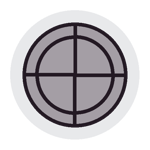

In [2]:
import shaper2_render as Render 
Render.renderShape('CuCuCuCu:CuCuCuCu', 150)._image

# SQL LITE

In [507]:
import os

def remove_file(file_path: str) -> None:
    try:
        os.remove(file_path)
        print(f"File {file_path} has been removed.")
    except FileNotFoundError:
        print(f"File {file_path} not found.")
    except PermissionError:
        print(f"Permission denied: cannot delete {file_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# remove_file('key_value_store.db')

File key_value_store.db has been removed.


In [527]:
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('key_value_store.db')

# Create a cursor object
cur = conn.cursor()

# Create a table to store key/value pairs if it doesn't exist
cur.execute('''
    CREATE TABLE IF NOT EXISTS key_value_store (
        key TEXT PRIMARY KEY,
        nlayer INT,

        operator TEXT,
        opindex INTEGER,

        parentA TEXT,
        rotationA INT,
        
        parentB TEXT, 
        rotationB INT,
        ischeck BOOLEAN
    )
''')

# Commit changes and close the connection (optional, keep open for subsequent operations)
conn.commit()


# Function to check if a key exists
def key_exists(key: str) -> bool:
    cur.execute('SELECT 1 FROM key_value_store WHERE key = ?', (key,))
    return cur.fetchone() is not None

def get_keys() -> bool:
    cur.execute('SELECT key FROM key_value_store')
    return cur.fetchall() 

# Function to add or update a key/value pair
def add_key_value(key: str, nlayer:int, op:str, parentA: str="", rotationA:int=0, parentB: str="", rotationB:int=0, opindex:int=0) -> None:
    cur.execute('''
        INSERT OR REPLACE INTO key_value_store (key, nlayer, operator, parentA, rotationA, parentB, rotationB, opindex, ischeck)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, false)
    ''', (key,  nlayer, op, parentA, rotationA, parentB,  rotationB, opindex))
    # ON CONFLICT(key) DO UPDATE SET value=excluded.value
    conn.commit()

# Function to retrieve a value by key
def get_value(key: str) -> str:
    cur.execute('SELECT value FROM key_value_store WHERE key = ?', (key,))
    result = cur.fetchone()
    return result[0] if result else None

# Function to set "ischeck" for an existing key
def set_ischeck(key: str, ischeck_value: bool=True) -> None:
    if key_exists(key):
        cur.execute('''
            UPDATE key_value_store
            SET ischeck = ?
            WHERE key = ?
        ''', (ischeck_value, key))
        conn.commit()
    else:
        print(f"Key '{key}' does not exist.")

# Function to get the first key with ischeck = False
def get_first_unchecked_key() -> str:
    cur.execute('''
        SELECT key FROM key_value_store
        WHERE ischeck = false 
        ORDER BY ROWID ASC
        LIMIT 1
    ''')
    result = cur.fetchone()
    return result[0] if result else None

# Function to get all the checked keys
def get_checked_key(nLayerMax:int) -> str:
    cur.execute('''
        SELECT key FROM key_value_store
        WHERE ischeck = true AND nlayer <= ?
        ORDER BY ROWID ASC
    ''', (nLayerMax,))
    result = cur.fetchall()
    return result


def search_exact_shape(key:str) -> str:
    cur.execute('''
        SELECT * FROM key_value_store
        WHERE key = ?
        ORDER BY ROWID ASC
        LIMIT 1
    ''', (key,))
    rows = cur.fetchall()
    if (not rows):
        return None
    key, nlayer, operator, opindex, parentA, rotationA, parentB, rotationB, ischeck = rows[0]
    return {
        'shapeCode': key, 
        'op': operator, 
        'nlayer':nlayer,
        'parentA':parentA, 'rotationA': rotationA,
        'parentB':parentB, 'rotationB': rotationB,
        'ischeck':ischeck, 
        'opindex':opindex
    }


def search_parent_shape(key:str) -> str:
    cur.execute('''
        SELECT * FROM key_value_store
        WHERE parentA = ? OR parentB = ?
        ORDER BY ROWID ASC
    ''', (key, key,))
    rows = cur.fetchall()
    if (not rows):
        return None
    result = []
    for it in rows:
        key, nlayer, operator, opindex, parentA, rotationA, parentB, rotationB, ischeck = it
        result.append({
            'shapeCode': key, 
            'op': operator, 
            'nlayer':nlayer,
            'parentA':parentA, 'rotationA': rotationA,
            'parentB':parentB, 'rotationB': rotationB,
            'ischeck':ischeck, 
            'opindex':opindex
        })
    return result


# Function to get all the checked keys
def print_db_count() -> str:
    cur.execute('''
        SELECT COUNT(key) WHERE ischeck = true
    ''')
    result = cur.fetchone()
    print (f"{'Total Check':<30}{result:<10}")

    cur.execute('''
        SELECT COUNT(key) WHERE ischeck = false
    ''')
    result = cur.fetchone()
    print (f"{'Total uncheck':<30}{result:<10}")
    return result

def print_db_count() -> None:
    cur.execute('''
        SELECT COUNT(*) 
        FROM key_value_store 
        WHERE ischeck = 1
    ''')
    checked_count = cur.fetchone()[0]

    # Get the count of unchecked items
    cur.execute('''
        SELECT COUNT(*) 
        FROM key_value_store 
        WHERE ischeck = 0
    ''')
    unchecked_count = cur.fetchone()[0]

    # Print the counts
    print(f"{'Total Checked':<30}{checked_count:<10}")
    print(f"{'Total Unchecked':<30}{unchecked_count:<10}")



def print_db(n: int=10) -> None:
    cur.execute('''
        SELECT * FROM key_value_store
        LIMIT ?
    ''', (n,))
    
    rows = cur.fetchall()
    # Print the header
    print(f"{'Key':<45}{'nl':<5}{'Op':<5}{'ParentA':<42}{'rotA':<5}{'ParentB':<42}{'rotA':<5}{'OpIdx':<5}{'IsCheck':<5}")
    print("="*115)
    
    # Print the rows
    for row in rows:
        key, nlayer, operator, opindex, parentA, rotationA, parentB, rotationB, ischeck = row
        print(f"{key:<45}{nlayer:<5}{operator:<5}{parentA:<42}{rotationA:<5}{parentB:<42}{rotationB:<5}{opindex:<5}{ischeck:<5}")


In [509]:
# Add a new key/value pair
add_key_value('CuCuCuCu', 1, 'start', '', 0, '', 0, 0)

key = get_first_unchecked_key()
# print_db_count()
print_db(10)

# print (get_first_unchecked_key())
print("="*100)
print_db_count()

print("="*100)
print (search_exact_shape('CsdqsduRu'))
print (search_exact_shape('CuCuCuCu'))



Key                                          nl   Op   ParentA                                   rotA ParentB                                   rotA OpIdxIsCheck
CuCuCuCu                                     1    start                                          0                                              0    0    0    
Total Checked                 0         
Total Unchecked               1         
None
{'shapeCode': 'CuCuCuCu', 'op': 'start', 'nlayer': 1, 'parentA': '', 'rotationA': 0, 'parentB': '', 'rotationB': 0, 'ischeck': 0, 'opindex': 0}


In [530]:

list_of_keys = get_keys()
set_of_keys = set(list_of_keys)


{('P-P---P-:P-P---P-:P-CuCuCu:P-P-----',),
 ('P-P-P-P-:P-P-CuCu:P-P-----:P-P-----',),
 ('----crCu:----Cucr:CuCuCuCu:CuCu--Cu',),
 ('crcrCuCu:P-P-CuCu:CuCuP-Cu:Cu--CuCu',),
 ('CuP-crCu:CuCuCuCu:CuCuCuP-:CuCuP-Cu',),
 ('P-P-P-Cu:CuP-P-Cu:P-P-CuCu:----P-Cu',),
 ('crcrCuCu:P-P-CuCu:----P-P-:----CuP-',),
 ('crcrP-P-:CuCuP-P-:P-P-P-Cu:CuCuP-Cu',),
 ('P-P---P-:crcr--Cu:P-P-----:P-------',),
 ('CuCucrCu:Cu--Cucr:CuCuCuP-:CuCu--P-',),
 ('P-P-crcr:CuCucrCu:P---CuCu:CuCuCuCu',),
 ('----crCu:----crcr:----CuCu:----crCu',),
 ('CuP---P-:--P---Cu:CuCuCuCu:--Cu----',),
 ('P-Cu--Cu:P-CuCuCu:P-P-P-P-:----P-Cu',),
 ('CucrCuCu:CuCucrcr:CuCuP-Cu:P-Cu--P-',),
 ('P-P-crCu:CuCu--P-:--Cu----',),
 ('crcrP-Cu:P-----P-:CuCuCuCu:----CuP-',),
 ('------Cu:CuCuCucr:CuP-CuCu:CuCu--Cu',),
 ('crcrP-P-:CuP-P-Cu:P-P-CuCu:----P---',),
 ('crcrCuP-:P-P-CuP-:P-CuCuCu:P-CuCu--',),
 ('Cu--CuCu:CuCucrcr:CuP-P-Cu:P-P---Cu',),
 ('CucrCucr:P-P-CuCu:CuCuP-P-',),
 ('P-P-P-Cu:P-Cu--Cu:CuCu--Cu:--CuCu--',),
 ('CuCu--Cu:CuP-CuCu:P-P-CuP-

In [512]:
# key: str, nlayer:int, op:str, parentA: str="", rotationA:int, parentB: str="", rotationB:int=0, opindex:int=0


def index_shape(mshape:MShape, op:str, parentA, rotA:int, parentB: str, rotB:int, opindex:int=0) -> None:
    a = mshape
    b = a.rotC()
    c = b.rotC()
    d = c.rotC()
    if (
        not key_exists(a.toCode()) and not key_exists(b.toCode()) and not key_exists(c.toCode()) and not key_exists(d.toCode())
    ):
        add_key_value(mshape.toCode(), mshape.shape.numLayers, op, parentA, rotA, parentB, rotB, opindex)

onelayer_shape = get_checked_key(1)

def apply_shape_function():
    shapeCode = get_first_unchecked_key()
    # print ("# {", shapeCode, "}")
    if (not shapeCode):
        print ('####################### UncheckCode Not Found ##################################### ')
        return False

    mshape = MShape(shapeCode)
    # index_shape(mshape.rotC(), 'rot', shapeCode, '', 0)   
    
    index_shape(mshape.pin(), 'pin', parentA=shapeCode, rotA=0, parentB='', rotB=0, opindex=0)   
    index_shape(mshape.crys("r"), 'crys', parentA=shapeCode, rotA=0, parentB='', rotB=0, opindex=0)   

    a, b = cut(mshape)
    index_shape(a, 'cut', parentA=shapeCode, rotA=0, parentB='', rotB=0, opindex=0)   
    index_shape(b, 'cut', parentA=shapeCode, rotA=0, parentB='', rotB=0, opindex=1)   
    a, b = cut(mshape.rotC())
    index_shape(a, 'cut', parentA=shapeCode, rotA=1, parentB='', rotB=0, opindex=0)   
    index_shape(b, 'cut', parentA=shapeCode, rotA=1, parentB='', rotB=0, opindex=1)   

    nlayer = mshape.shape.numLayers
    if (nlayer > 3): 
        set_ischeck(shapeCode)
        return True

    for it in onelayer_shape:
        shapeCodeB = it[0]
        mshapeB = MShape(shapeCodeB)
        a, b = swap(mshape, mshapeB)
        index_shape(a, 'swap', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=0, opindex=0)   
        index_shape(b, 'swap', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=0, opindex=1)   

        a = stack(mshape, mshapeB)
        index_shape(a, 'stack', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=0, opindex=0) 
        a = stack(mshape, mshapeB.rotC())
        index_shape(a, 'stack', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=1, opindex=0) 
        a = stack(mshape, mshapeB.rotH())
        index_shape(a, 'stack', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=2, opindex=0) 
        a = stack(mshape, mshapeB.rotAC())
        index_shape(a, 'stack', parentA=shapeCode, rotA=0, parentB=shapeCodeB, rotB=3, opindex=0) 

        b = stack(mshape, mshapeB)
        index_shape(b, 'stack', parentA=shapeCodeB, rotA=0, parentB=shapeCode, rotB=0, opindex=0) 
        b = stack(mshape, mshapeB.rotC())
        index_shape(b, 'stack', parentA=shapeCodeB, rotA=0, parentB=shapeCode, rotB=1, opindex=0) 
        b = stack(mshape, mshapeB.rotH())
        index_shape(b, 'stack', parentA=shapeCodeB, rotA=0, parentB=shapeCode, rotB=2, opindex=0) 
        b = stack(mshape, mshapeB.rotAC())
        index_shape(b, 'stack', parentA=shapeCodeB, rotA=0, parentB=shapeCode, rotB=3, opindex=0) 


    set_ischeck(shapeCode)
    return True



In [513]:
from IPython.display import clear_output
import time


i = 0
while True:
    i += 1
    isapply = apply_shape_function()
    if (not isapply):
        print('no shape to find')
        break
    if (i % 100 == 0):
        # clear_output(wait=True)
        print('---------------------------', i)
        print_db_count()

# print_db(10)



--------------------------- 100
Total Checked                 1264      
Total Unchecked               28792     
--------------------------- 200
Total Checked                 1364      
Total Unchecked               30745     
--------------------------- 300
Total Checked                 1464      
Total Unchecked               32259     
--------------------------- 400
Total Checked                 1564      
Total Unchecked               32562     
--------------------------- 500
Total Checked                 1664      
Total Unchecked               33610     
--------------------------- 600
Total Checked                 1764      
Total Unchecked               34822     
--------------------------- 700
Total Checked                 1864      
Total Unchecked               35545     
--------------------------- 800
Total Checked                 1964      
Total Unchecked               36414     
--------------------------- 900
Total Checked                 2064      
Total Unchecked

KeyboardInterrupt: 

In [ ]:
print('---------------------------', i)
print_db_count()
print_db(100)

--------------------------- 10
Total Checked                 1712      
Total Unchecked               0         
Key                                          nl   Op   ParentA                                   rotA ParentB                                   rotA OpIdxIsCheck
----CuCu                                     1    cut  CuCuCuCu                                  0                                              0    0    1    
--------                                     1    cut  ----CuCu                                  0                                              0    1    1    
------Cu                                     1    cut  ----CuCu                                  1                                              0    0    1    
----CuCu:CuCuCuCu                            2    stack----CuCu                                  0    CuCuCuCu                                  0    0    1    
CuCuCuCu:CuCuCuCu                            2    stack--------                      

In [ ]:
# search_exact_shape('CuCu----:CuCuCuCu')


def searchShape( shapeCode):
    res = None
    a = MShape(shapeCode)
    res = search_exact_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_exact_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_exact_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_exact_shape(a.toCode())
    return res

def searchChild( shapeCode):
    res = None
    a = MShape(shapeCode)
    res = search_parent_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_parent_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_parent_shape(a.toCode())
    if res is None:
        a = a.rotC()
        res = search_parent_shape(a.toCode())
    return res

# search_parent_shape


# searchShape('CuCu----:CuCuCuCu:CuCu----')
# searchShape('CuCu----:CuCuCuCu')
len(searchChild('CuCu----:CuCuCuCu'))

48

In [ ]:
searchShape('CuCu----:CuCuCuCu:CuCu----')


{'shapeCode': '----CuCu:CuCuCuCu:----CuCu',
 'op': 'stack',
 'nlayer': 3,
 'parentA': '----CuCu:CuCuCuCu',
 'rotationA': 0,
 'parentB': '----CuCu',
 'rotationB': 0,
 'ischeck': 1,
 'opindex': 0}

In [518]:

def print_db() -> None:
    cur.execute('''
        SELECT * FROM key_value_store
        WHERE nlayer = 1
        LIMIT 100
    ''', ())
    
    rows = cur.fetchall()
    # Print the header
    print(f"{'Key':<45}\t{'nl':<5}\t{'Op':<5}\t{'ParentA':<42}\t{'rotA':<5}\t{'ParentB':<42}\t{'rotA':<5}\t{'OpIdx':<5}\t{'IsCheck':<5}")
    print("="*115)
    
    # Print the rows
    for row in rows:
        key, nlayer, operator, opindex, parentA, rotationA, parentB, rotationB, ischeck = row
        print(f"{key:<45}\t{nlayer:<5}\t{operator:<5}\t{parentA:<42}\t{rotationA:<5}\t{parentB:<42}\t{rotationB:<5}\t{opindex:<5}\t{ischeck:<5}")

print_db()


Key                                          	nl   	Op   	ParentA                                   	rotA 	ParentB                                   	rotA 	OpIdx	IsCheck
CuCuCuCu                                     	1    	start	                                          	0    	                                          	0    	0    	1    
----CuCu                                     	1    	cut  	CuCuCuCu                                  	0    	                                          	0    	0    	1    
crcrCuCu                                     	1    	crys 	----CuCu                                  	0    	                                          	0    	0    	1    
--------                                     	1    	cut  	----CuCu                                  	0    	                                          	0    	1    	1    
------Cu                                     	1    	cut  	----CuCu                                  	1    	                                          	0    	0 